## Reference-free spot cell-type deconvolution with STdeconvolve from 10X visium

### Install and load packages

In [2]:
install.packages("remotes")
system("apt install libgsl-dev", intern=TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in system("apt install libgsl-dev", intern = TRUE):
“running command 'apt install libgsl-dev' had status 100”


character(0)
attr(,"status")
[1] 100
attr(,"errmsg")
[1] "Resource temporarily unavailable"

In [3]:
install.packages('jsonlite')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Run BiocManager to install STdeconvolve. 
If the installment is unsuccesfull due to e.g. the package topicmodels, run the following command in a bash terminal:
`conda install -c conda-forge r-gsl`

In [17]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# The following initializes usage of Bioc devel
BiocManager::install(version=3.18)

BiocManager::install("STdeconvolve")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org



Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Old packages: 'dbplyr', 'evaluate', 'htmltools', 'httpuv', 'knitr', 'lattice',
  'lava', 'maps', 'Matrix', 'plotly', 'pROC', 'rprojroot', 'sctransform',
  'Seurat', 'SeuratObject', 'spatstat.data', 'spatstat.explore',
  'spatstat.geom', 'spatstat.random', 'spatstat.sparse', 'spatstat.utils',
  'stringi', 'stringr', 'xfun'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'STdeconvolve'”
Old packages: 'dbplyr', 'evaluate', 'htmltools', 'httpuv', 'knitr', 'lattice',
  'lava', 'maps', 'Matrix', 'plotly', 'pROC', 'rprojroot', 'sctransform',
  'Seurat', 'SeuratObject', 'spatstat.dat

if installing hdf5r has a non-zero exit, run `conda install -c conda-forge hdf5` in a bash terminal

In [20]:
BiocManager::install('hdf5r')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'hdf5r'

Warning message in install.packages(...):
“installation of package ‘hdf5r’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'dbplyr', 'evaluate', 'htmltools', 'httpuv', 'knitr', 'lattice',
  'lava', 'maps', 'Matrix', 'plotly', 'pROC', 'rprojroot', 'sctransform',
  'Seurat', 'SeuratObject', 'spatstat.data', 'spatstat.explore',
  'spatstat.geom', 'spatstat.random', 'spatstat.sparse', 'spatstat.utils',
  'stringi', 'stringr', 'xfun'



In [18]:
install.packages('tidyverse')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'hdf5r'

Warning message in install.packages(...):
“installation of package ‘hdf5r’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'dbplyr', 'evaluate', 'htmltools', 'httpuv', 'knitr', 'lattice',
  'lava', 'maps', 'Matrix', 'plotly', 'pROC', 'rprojroot', 'sctransform',
  'Seurat', 'SeuratObject', 'spatstat.data', 'spatstat.explore',
  'spatstat.geom', 'spatstat.random', 'spatstat.sparse', 'spatstat.utils',
  'stringi', 'stringr', 'xfun'



If SEURAT is not installed yet, please do so now, can take ~20 minutes
remotes::install_version("Seurat", version = "4.3.0")

In [31]:
library(Seurat)
library(STdeconvolve)
library(tidyverse)
library(hdf5r)


Attaching package: ‘hdf5r’


The following object is masked from ‘package:purrr’:

    flatten_df




### Download data

Current data is downloaded from the 10x Genomics Analysis Guides GitHub repository

In [8]:
download.file("https://raw.githubusercontent.com/10XGenomics/analysis_guides/main/2023_Exploring_Your_Visium_Data_input_files/VisiumFFPE_Mouse_Brain_Transgenic_Age_17p9_Rep_1.h5", "VisiumFFPE_Mouse_Brain_Transgenic_Age_17p9_Rep_1.h5")
download.file("https://raw.githubusercontent.com/10XGenomics/analysis_guides/main/2023_Exploring_Your_Visium_Data_input_files/astro_markers.csv","astro_markers.csv")
download.file("https://raw.githubusercontent.com/10XGenomics/analysis_guides/main/2023_Exploring_Your_Visium_Data_input_files/spatial_cord_subset_17p9_rep1.csv", "spatial_cord_subset_17p9_rep1.csv")
download.file("https://raw.githubusercontent.com/10XGenomics/analysis_guides/main/2023_Exploring_Your_Visium_Data_input_files/optlDA.17p9_rep1_astrogenes.rds","optlDA.17p9_rep1_astrogenes.rds")
list.files(path = ".")

[1] "astro_markers.csv"                                  
[2] "data_exploration.ipynb"                             
[3] "optlDA.17p9_rep1_astrogenes.rds"                    
[4] "README.md"                                          
[5] "seurat_conversion.ipynb"                            
[6] "spatial_cord_subset_17p9_rep1.csv"                  
[7] "visium_exploration.ipynb"                           
[8] "VisiumFFPE_Mouse_Brain_Transgenic_Age_17p9_Rep_1.h5"

### Functions

Function `marker_gene_list`:

Input
* Gexp: gene expression matrix from the optimal lda model
* topic: topic number from the optimal lda model
* exp_value: gene expression cut-off for considering genes highly expressed

Output
* Tibble containing highly expressed genes and their log2 fold change

In [9]:
marker_gene_list<-function(topic,exp_value,Gexp){
  ## highly expressed in cell-type of interest
  highgexp <- names(which(Gexp[topic,] > exp_value))
  ## high log2(fold-change) compared to other deconvolved cell-types
  log2fc <- sort(log2(Gexp[topic,highgexp]/colMeans(Gexp[-topic,highgexp])), decreasing=TRUE)
  return(tibble(Gene=names(log2fc),log2fc=log2fc))
}

marker_gene_list

function(topic,exp_value,Gexp){
  ## highly expressed in cell-type of interest
  highgexp <- names(which(Gexp[topic,] > exp_value))
  ## high log2(fold-change) compared to other deconvolved cell-types
  log2fc <- sort(log2(Gexp[topic,highgexp]/colMeans(Gexp[-topic,highgexp])), decreasing=TRUE)
  return(tibble(Gene=names(log2fc),log2fc=log2fc))
}

Function `plot_spatial`:

Input
* plot_data: table with spot proportion for a topic of interest
* suffix1: suffix defining the image type
* dir: output directory
* i: topic of interest number

Output
* Spatial plot colored by topic proportion

In [10]:
plot_spatial<-function(plot_data=plot_data,suffix1='_prop.jpg',dir=dir,i){
  p1<-ggplot(plot_data, aes(x, y,fill = prop)) +
    geom_point(shape=21,size=4) + 
    guides(size="none")+
    labs(title=str_c("topic ",i))+
    scale_fill_viridis_c() +
    theme_void()+
    coord_equal()
  print(p1)
  ggsave(plot = p1, paste(dir,"topic_",i,suffix1, sep=''), 
         height=5, width=5, units='in', dpi=300)
 
}

Function `run_me_QC`:

Input
* ldas: model object
* starting_k
* ending_k

Output
* QC plot for fitted models

In [11]:
run_me_QC<-function(ldas,starting_k=2,ending_k=22,dir){
  if(!dir.exists(dir)){dir.create(dir)}
  alpha<-map(.x = (starting_k-1):(ending_k-1),~ldas$model[[.x]]@alpha)%>%unlist
  plot_df<-tibble(K=starting_k:ending_k,alpha=alpha,perplexities=ldas$perplexities,rare=ldas$numRare)
  p1<-ggplot(data = plot_df) +
    geom_line(mapping = aes(x = K,y = perplexities), color="red3",size=2) +
    geom_point(mapping = aes(x = K,y = perplexities),shape=21, color="black", fill=ifelse(alpha > 1, "white", "red3"), size=6)+
    theme_linedraw(base_size = 16,base_rect_size =2,base_line_size = 2)+ylab("perplexity")+
    ylim(min(plot_df$perplexities)-10,10+max(plot_df$perplexities))
  p2<-ggplot(data = plot_df) +
    geom_point(mapping = aes(x = K,y = rare),shape=21, color="black", fill="blue", size=4)+
    geom_line(mapping = aes(x = K,y = rare), color="blue",size=2)+
    theme_linedraw(base_size = 16,base_rect_size =2,base_line_size = 2)+ylab("cell−types with mean proportion < 5%")
  p3<-ggplot(data = plot_df) +
    geom_line(mapping = aes(x = K,y = alpha), color="darkgreen",size=2) +ylim(c(0,1))+
    geom_point(mapping = aes(x = K,y = alpha),shape=21, color="black", fill=ifelse(alpha > 1, "white", "darkgreen"), size=6)+
    theme_linedraw(base_size = 16,base_rect_size =2,base_line_size = 2)+ylab("alpha")
  print(p1+p2+p3)
  ggsave(plot = p1+p2+p3,filename = str_c(dir,"merged_QC_plot.jpg"),height=5, width=12, units='in', dpi=300)
}

Function `run_me_results`:

Input
* opt: optimal model number
* ldas: object returned from the fitLDA function
* dir: output directory

Output
* generates spatial plots for each topic for the optimal model & exports the log2 fold change for highly expressed genes for each topic for the optimal model.

In [12]:
run_me_results<-function(opt,
                         dir,ldas ){
  optLDA <- optimalModel(models = ldas, opt = opt)
  results <- getBetaTheta(optLDA,
                          perc.filt = 0.05,
                          betaScale = 1000)
  deconProp <- results$theta
  deconGexp <- results$beta
  
  if(!dir.exists(dir)){dir.create(dir)}
  
  for(i in 1:dim(deconProp)[2]){
    plot_data<-merge(pos,deconProp[,i],by = 0)
    names(plot_data)<-c("barcode","x","y","prop")
    
    plot_spatial(plot_data=plot_data,suffix1='_prop.jpg',dir=dir,i=i)
    
  }
    
  marker_gene_output<-map(.x = 1:dim(deconGexp)[1],
                          ~marker_gene_list(topic = .x,exp_value = 2,Gexp = deconGexp))
  names(marker_gene_output)<-str_c("topic_genes_exp2.",1:dim(deconGexp)[1],".csv")
  
  map2(.x = names(marker_gene_output),
       .y = marker_gene_output,
       ~write_csv(x = .y,file = paste(dir,.x)))
  
 
}

### Load and preprocess data

In [32]:
counts<-Read10X_h5(filename = "VisiumFFPE_Mouse_Brain_Transgenic_Age_17p9_Rep_1.h5")
spatial_barcodes<-read_csv("spatial_cord_subset_17p9_rep1.csv")

Rows: 396 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): barcode
dbl (5): in_tissue, array_row, array_col, pxl_row_in_fullres, pxl_col_in_ful...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


subset the input data to focus on the region of interest

In [36]:
counts_subset <- counts[,colnames(counts)%in%spatial_barcodes$barcode]
pos<-as.data.frame(spatial_barcodes)
rownames(pos)<-pos[,1]
pos<-pos[,5:6]
names(pos)<-c("x","y")

Filter count matrix to remove low quality spots and poorly expressed genes

In [34]:
counts_subset_clean <- cleanCounts(counts = counts_subset,
                                   min.lib.size = 100,
                                   min.reads = 1,
                                   min.detected = 1,
                                   verbose = TRUE)

Filtering matrix with 396 cells and 19465 genes ...

Resulting matrix has 396 cells and 14703 genes



Selecting genes for the model. First, the overdispersed genes are determined.

In [37]:
odGenes <- getOverdispersedGenes(as.matrix(counts_subset_clean),
                                 gam.k=5,
                                 alpha=0.05,
                                 plot=FALSE,
                                 use.unadjusted.pvals=FALSE,
                                 do.par=TRUE,
                                 max.adjusted.variance=1e3,
                                 min.adjusted.variance=1e-3,
                                 verbose=FALSE, details=TRUE)

In [39]:
genes <- odGenes$ods
length(genes)

[1] 1019

Second, we load a list of canonical astrocyte markers and then merge them with the list of overdispersed genes

In [40]:
astro<-read_csv(file = "astro_markers.csv")
astro_overlap_fit<-rownames(counts_subset_clean)%in%astro$`Astrocyte Markers`
astro_overlap<-rownames(counts_subset_clean)[astro_overlap_fit]
gene_astro<-c(genes,astro_overlap)%>%unique()

Rows: 46 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Astrocyte Markers

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The merged overdispersed gene and canonical astrocyte marker list is used to generate the corpus for the model.

In [41]:
corpus<-preprocess(t(as.matrix(counts_subset_clean)),
                   selected.genes = gene_astro,plot=FALSE,
                   min.reads = 1, 
                   min.lib.size = 100, 
                   min.detected = 1,
                   ODgenes = FALSE, 
                   verbose = TRUE)

Initial genes: 14703 Initial pixels: 396


- Using genes in `selected.genes` for corpus.


 1058 genes are present in dataset.


- Removing poor pixels with <= 100 reads


- Removing genes with <= 1 reads across pixels and detected in <= 1 pixels


  Remaining genes: 1058 and remaining pixels: 396


Genes in corpus > 1000 (1058). This may cause model fitting to take a while. Consider reducing the number of genes.


- Check that each pixel has at least 1 non-zero gene count entry..


Final corpus:




A 396x1058 simple triplet matrix.


Preprocess complete.




### LDA model fitting

Fit the LDA model for K values and find the optimal numbers of cell-types K. Can take ~30-60 minutes.

In [42]:
ldas <- fitLDA(corpus$corpus, Ks = seq(2, 22, by = 1),
               perc.rare.thresh = 0.05,
               plot=FALSE,
               ncores=4,
               verbose=TRUE)

Loading required package: topicmodels

Time to fit LDA models was 19.05 mins

Computing perplexity for each fitted model...

Time to compute perplexities was 0.1 mins

Getting predicted cell-types at low proportions...

Time to compute cell-types at low proportions was 0 mins



In [43]:
# This cell allows you to save the object from the previous cell
saveRDS(object = ldas,file = "optlDA.17p9_rep1_astrogenes.rds")

# Command below can be used to load the RDS file that is downloaded above.
# ldas<-readRDS(file = "optlDA.17p9_rep1_astrogenes.rds")

Output spatial plots for each topic and its log2 fold change of highly expressed genes. 

Filtering out cell-types in pixels that contribute less than 0.05 of the pixel proportion.




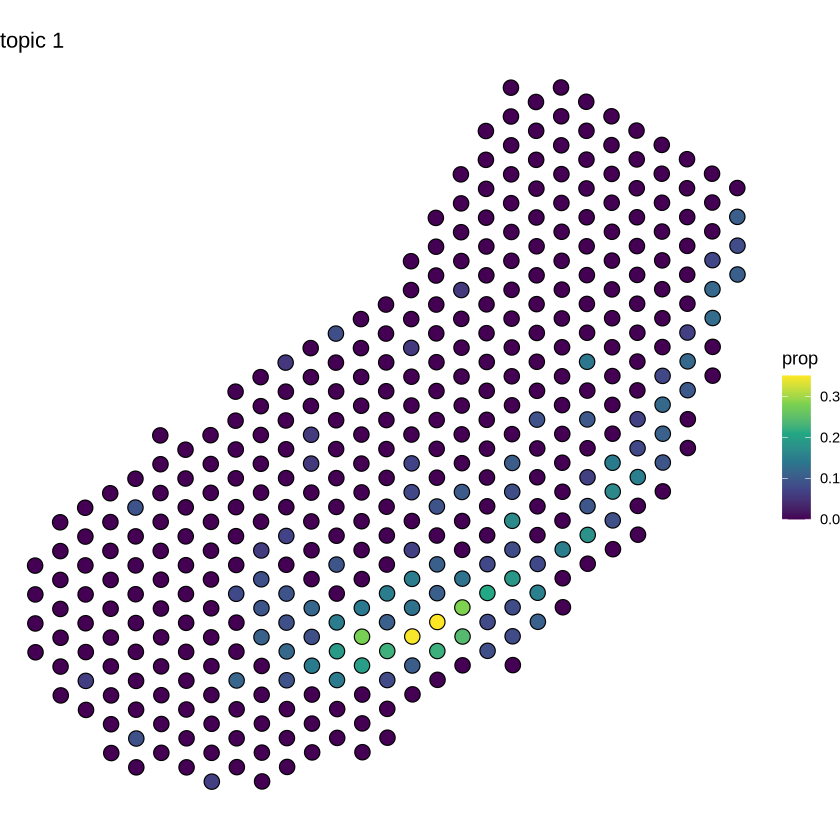

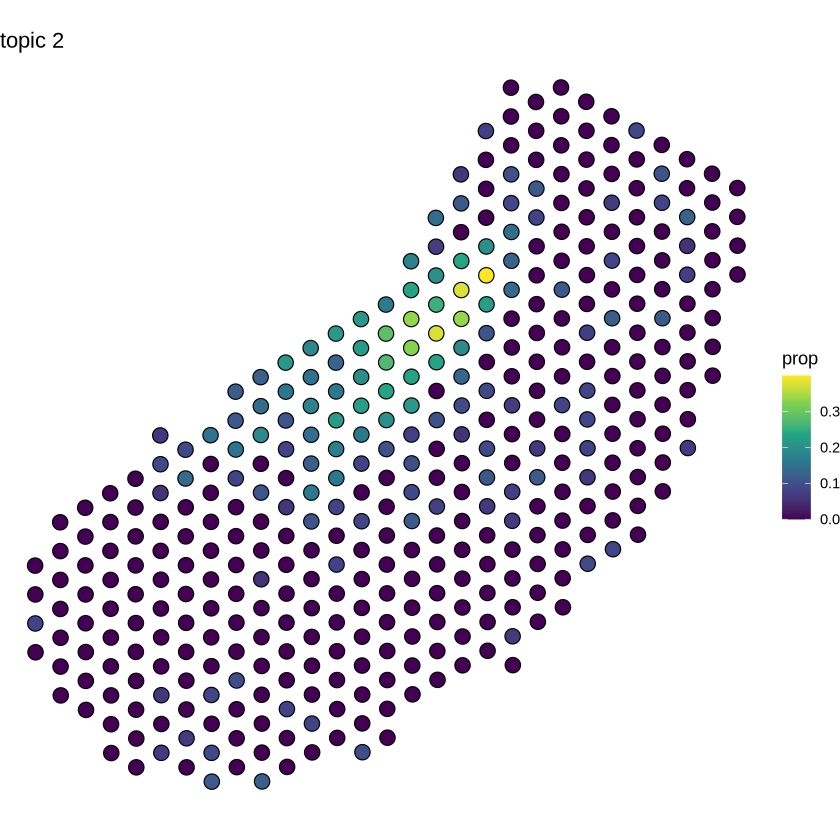

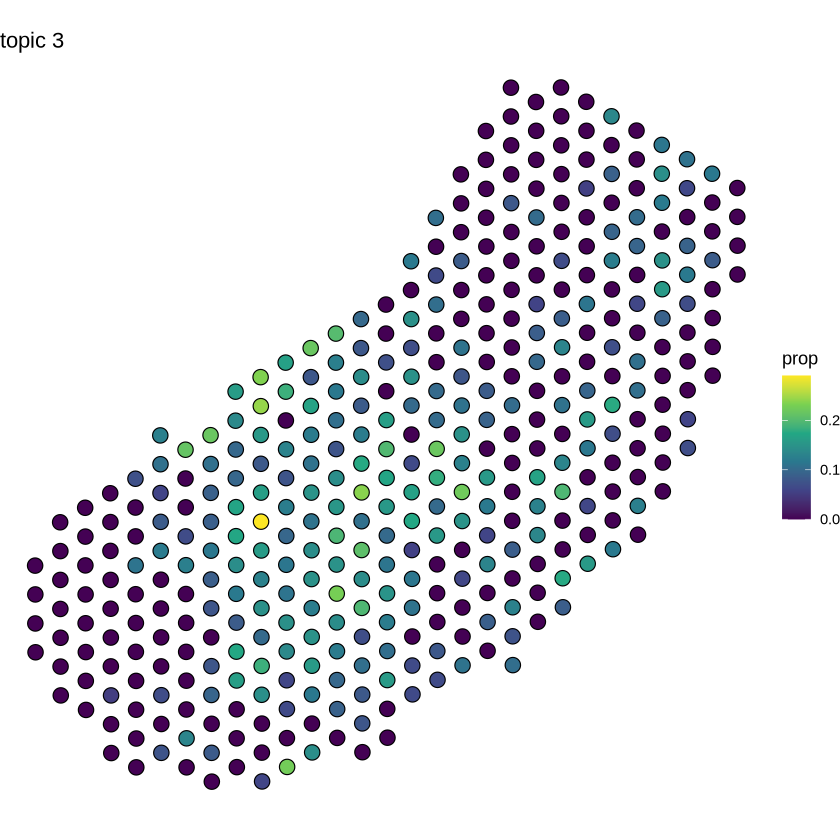

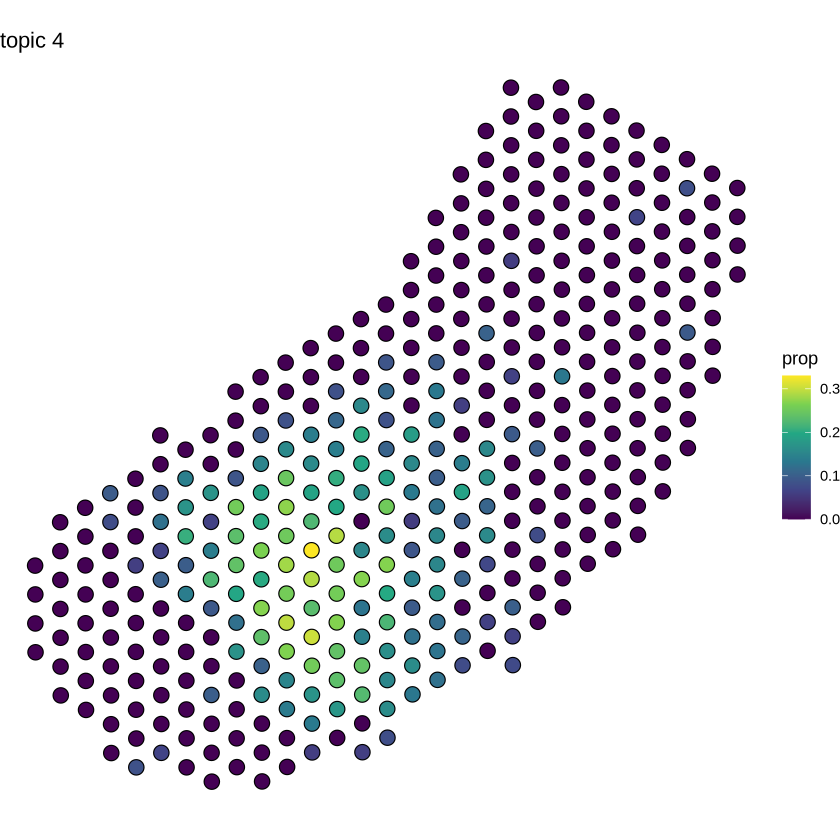

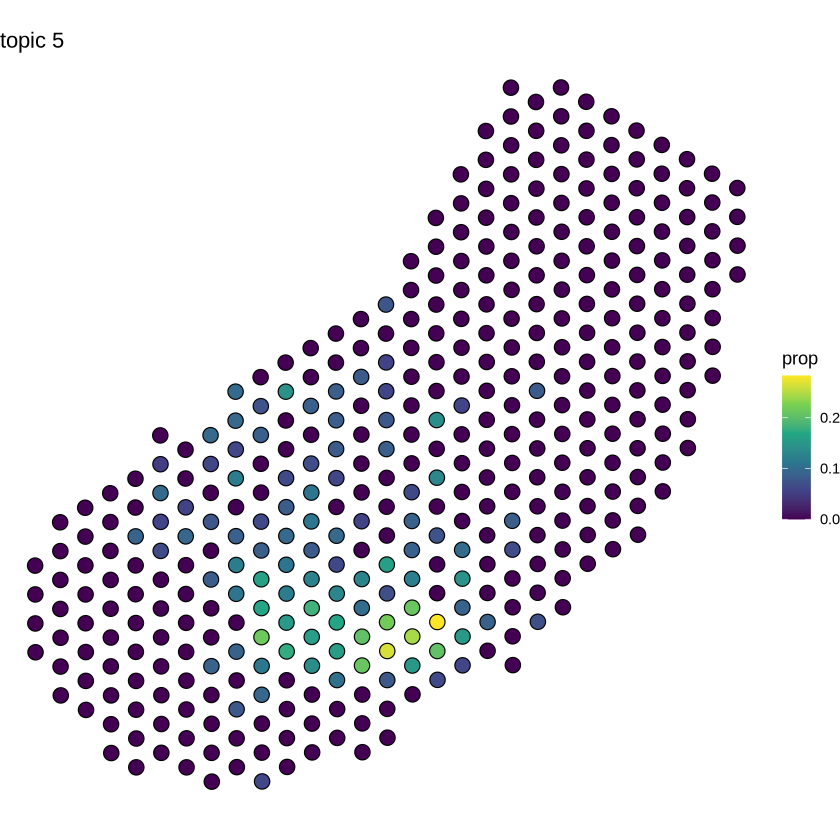

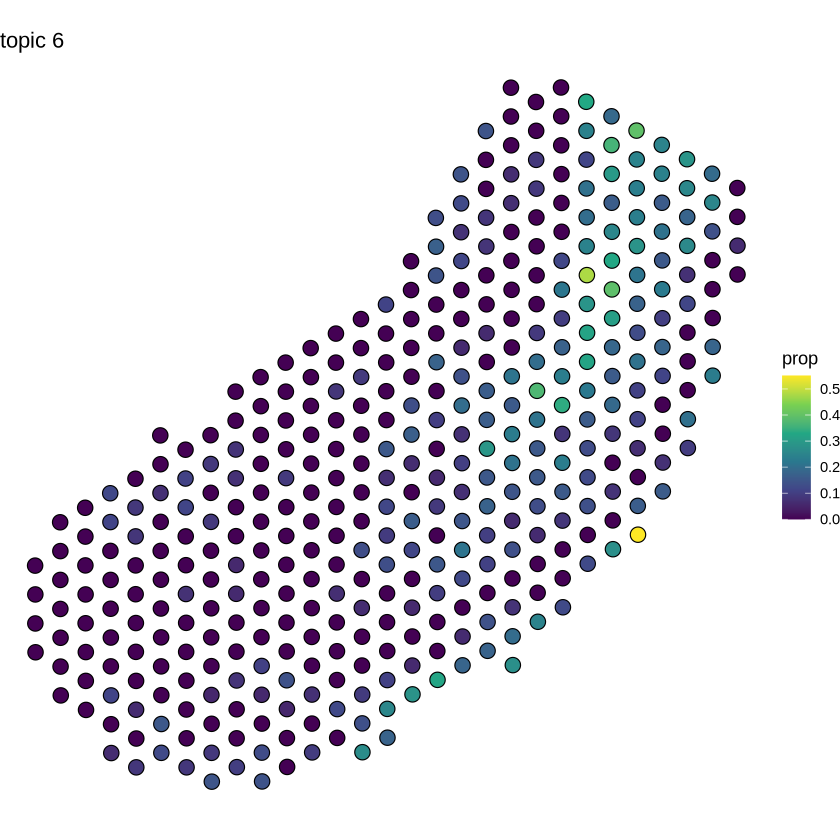

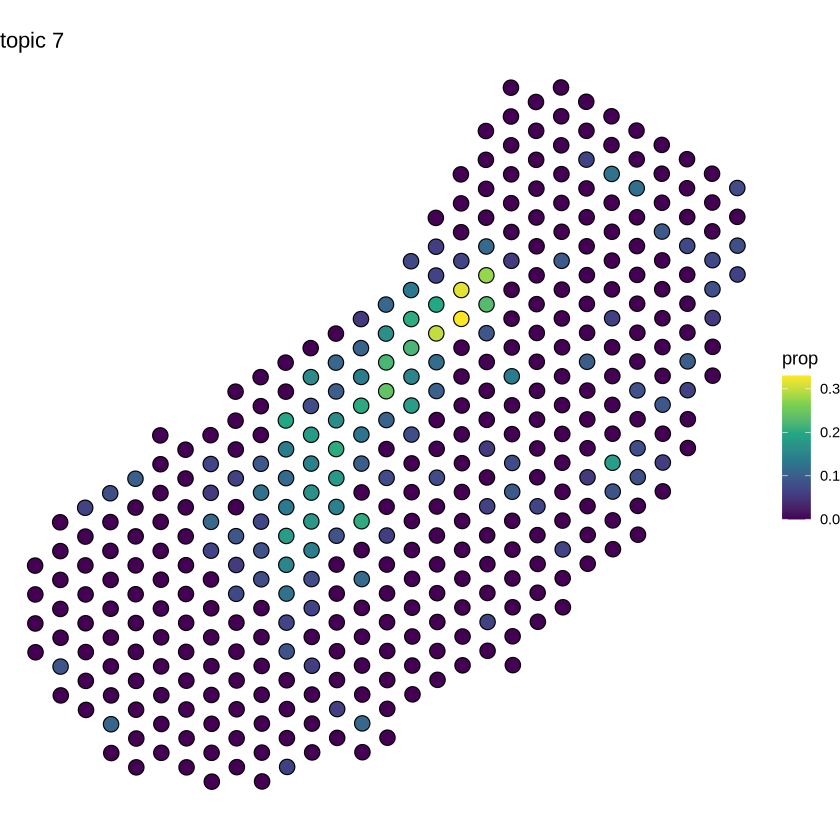

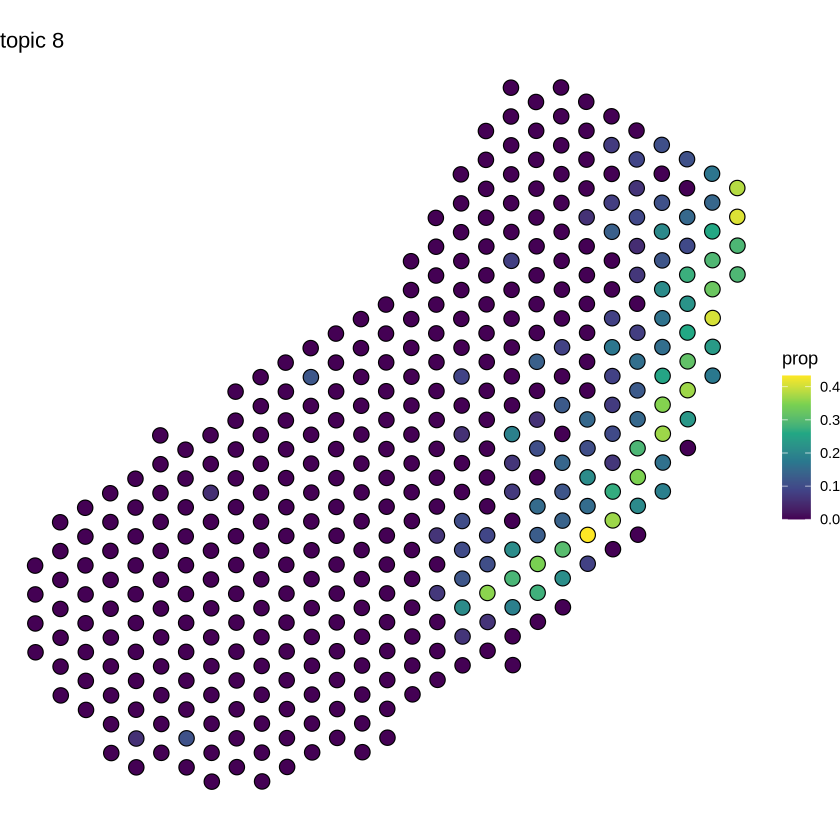

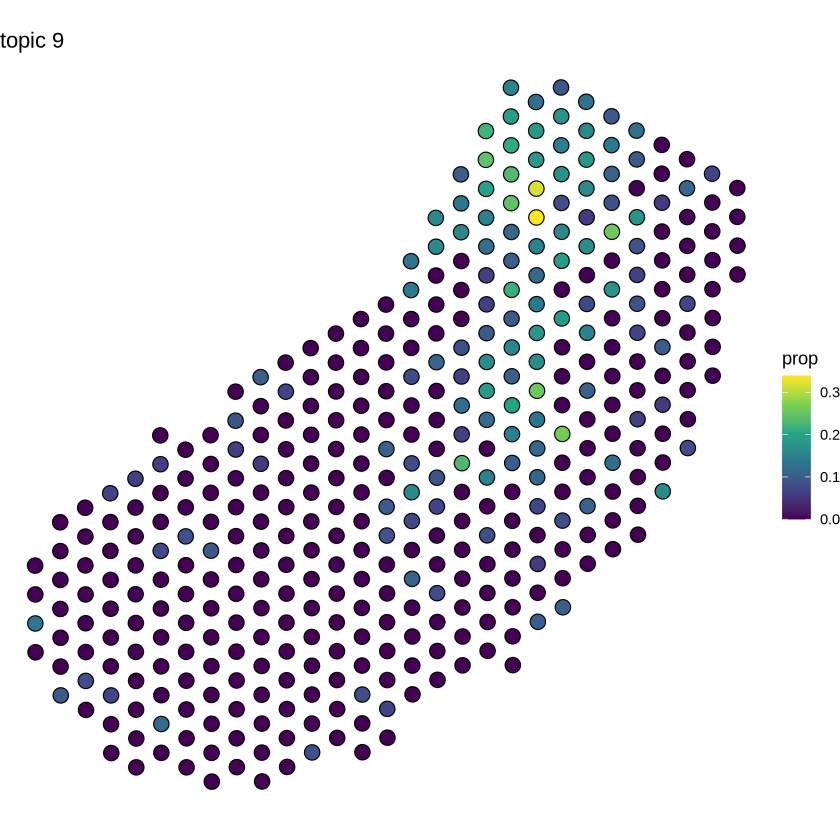

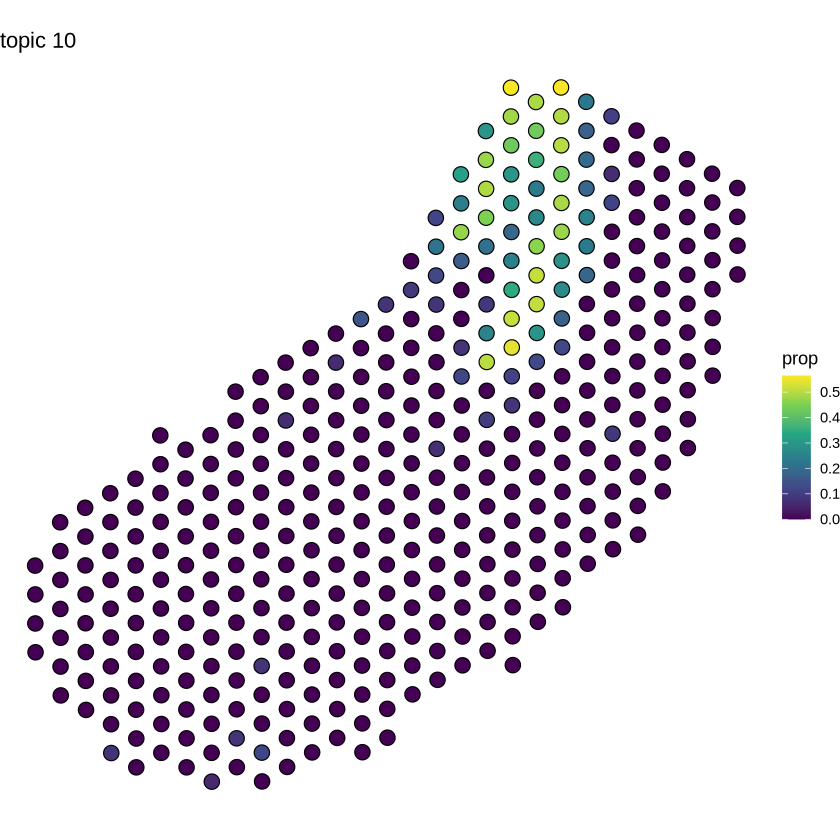

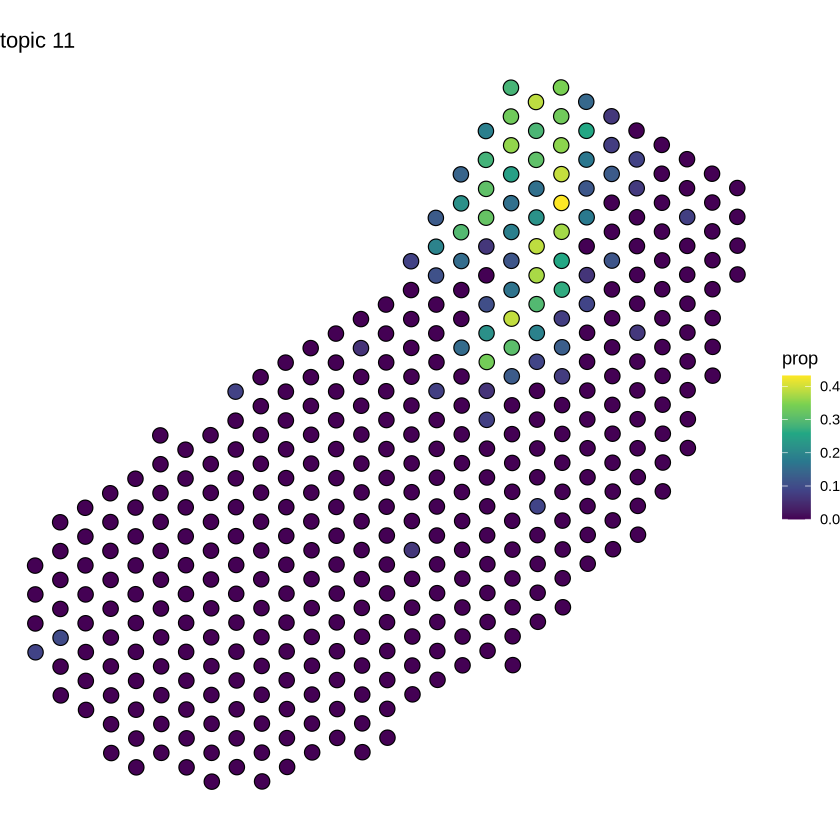

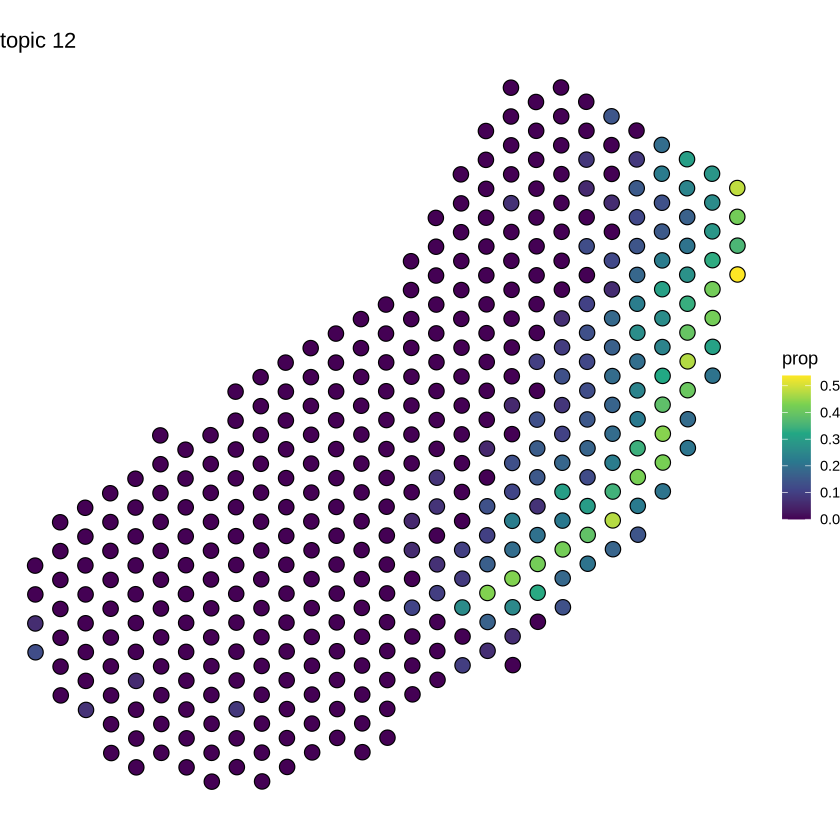

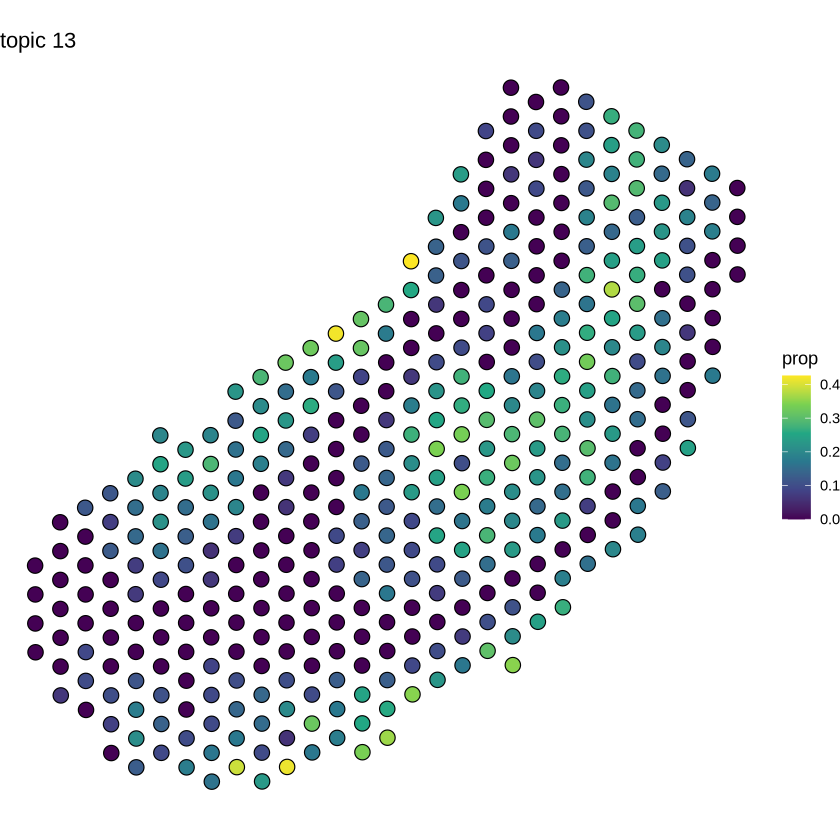

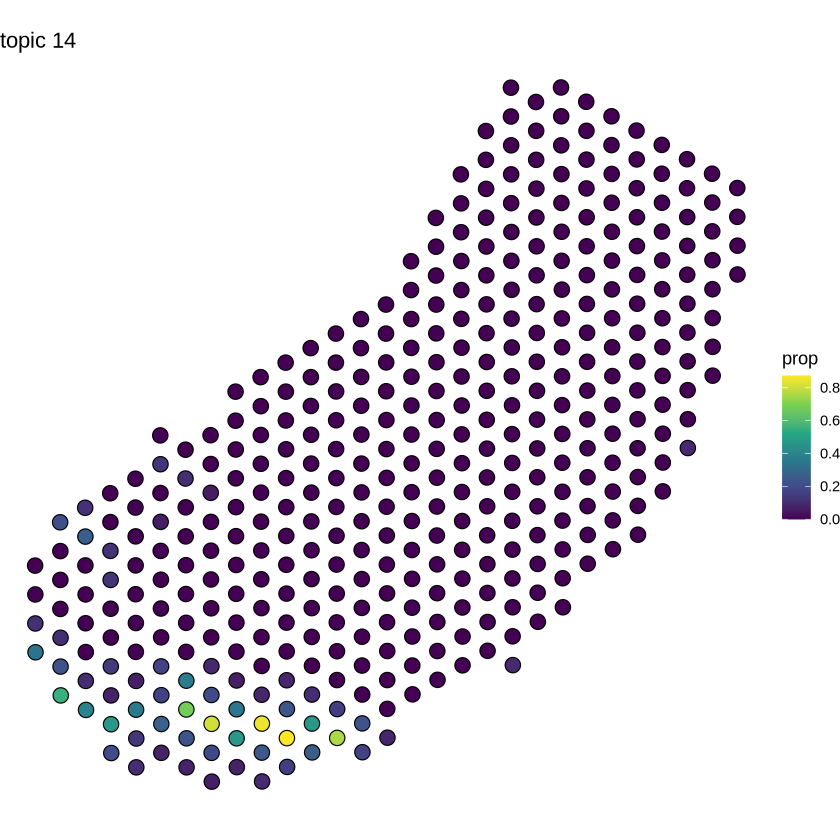

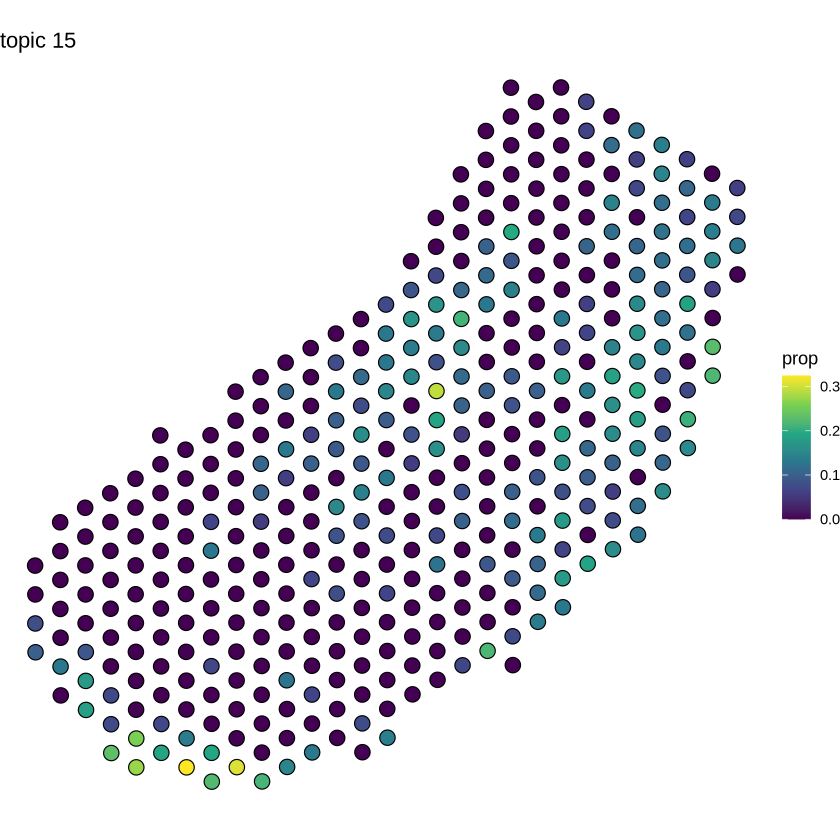

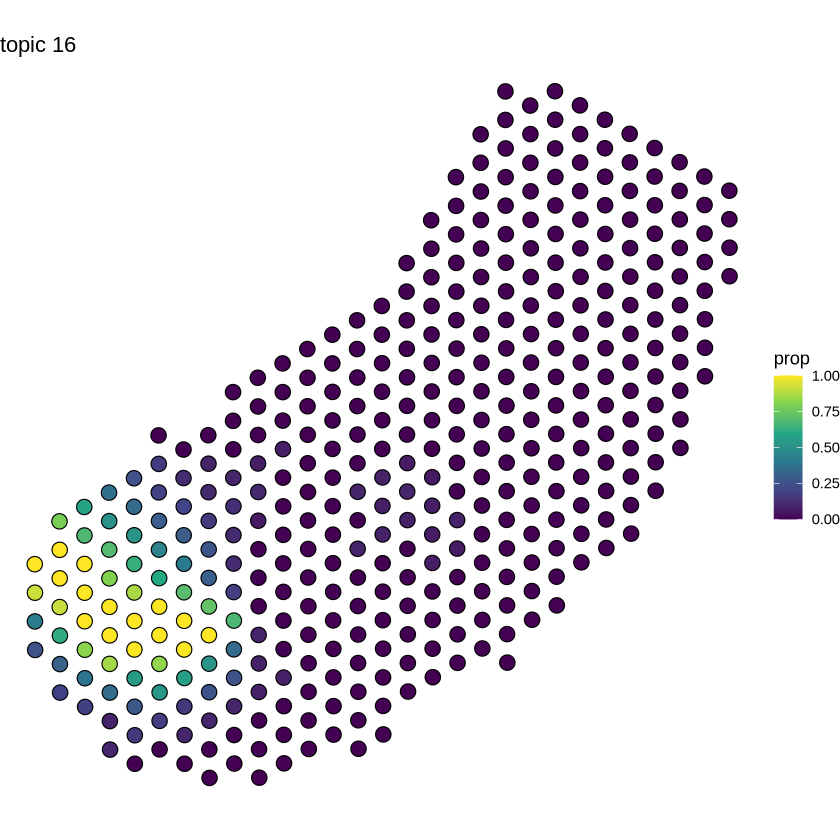

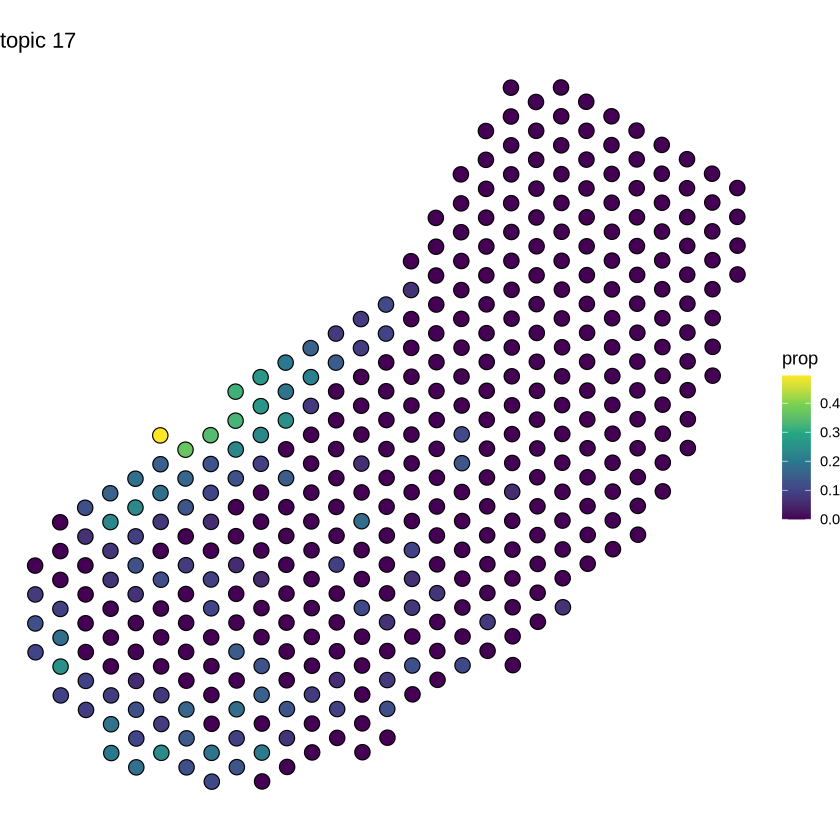

[[1]]
# A tibble: 142 × 2
   Gene   log2fc
   <chr>   <dbl>
 1 Gm2115   2.61
 2 Wipf3    2.48
 3 Crym     2.18
 4 Kit      2.15
 5 Cpne6    1.99
 6 Ppm1e    1.97
 7 Pgm2l1   1.95
 8 Epha6    1.89
 9 Prdm8    1.76
10 Lrrn2    1.74
# ℹ 132 more rows

[[2]]
# A tibble: 110 × 2
   Gene    log2fc
   <chr>    <dbl>
 1 Trps1     3.26
 2 Rph3a     2.20
 3 Epha7     2.09
 4 Synpr     2.04
 5 Hs6st3    1.97
 6 Chgb      1.96
 7 Nptx1     1.90
 8 Nrn1      1.86
 9 Neurod6   1.81
10 Cpne4     1.74
# ℹ 100 more rows

[[3]]
# A tibble: 120 × 2
   Gene     log2fc
   <chr>     <dbl>
 1 Lynx1      2.21
 2 Nefl       2.16
 3 Hspa12a    1.80
 4 Syt3       1.77
 5 Cabp7      1.65
 6 Atp6v1b2   1.61
 7 Pgm2l1     1.60
 8 Cntnap1    1.54
 9 Neto1      1.53
10 Hapln4     1.52
# ℹ 110 more rows

[[4]]
# A tibble: 127 × 2
   Gene  log2fc
   <chr>  <dbl>
 1 Myo5b   3.08
 2 Nnat    2.25
 3 Rab15   2.16
 4 Neto1   2.16
 5 Plch2   2.09
 6 Lynx1   1.89
 7 Tmem9   1.85
 8 Grik4   1.81
 9 Trnp1   1.78
10 Lrrn2   1.67
# ℹ 117 more rows

[[5]]
# A tibble: 129 × 2
   Gene   log2fc
   <chr>   <dbl>
 1 Npy2r    2.66
 2 Cpne7    2.63
 3 Necab2   2.58
 4 Asph     2.40
 5 Kit      2.38
 6 Shisa6   2.37
 7 Lpl      2.20
 8 Rasd1    2.10
 9 Mpp3     2.07
10 Hapln4   2.04
# ℹ 119 more rows

[[6]]
# A tibble: 108 × 2
   Gene  log2fc
   <chr>  <dbl>
 1 Cd74    3.97
 2 Sst     3.37
 3 Vim     3.21
 4 Gfap    2.93
 5 Gja1    2.85
 6 Adcy1   2.39
 7 Aqp4    2.34
 8 Cebpd   2.34
 9 Ezr     2.05
10 Npc2    1.98
# ℹ 98 more rows

[[7]]
# A tibble: 117 × 2
   Gene   log2fc
   <chr>   <dbl>
 1 Nr4a3    2.64
 2 Lpl      2.48
 3 Camk1d   2.10
 4 Gpc1     2.05
 5 Rnf112   1.94
 6 Arl15    1.87
 7 Nptxr    1.75
 8 Kcnc2    1.72
 9 Chgb     1.71
10 Clstn2   1.65
# ℹ 107 more rows

[[8]]
# A tibble: 125 × 2
   Gene    log2fc
   <chr>    <dbl>
 1 Pou3f1    3.77
 2 Kcnab1    2.99
 3 Hs6st3    2.44
 4 Igfbp4    2.34
 5 Mal2      2.19
 6 Sstr4     2.12
 7 Tspan13   1.89
 8 Chrd      1.79
 9 Plekhg5   1.78
10 Hpca      1.76
# ℹ 115 more rows

[[9]]
# A tibble: 133 × 2
   Gene     log2fc
   <chr>     <dbl>
 1 Fam163b    3.18
 2 Marcksl1   3.02
 3 Glis3      2.77
 4 Dgat2      2.76
 5 Pitpnm2    2.40
 6 Gria2      2.31
 7 Paqr9      2.30
 8 Arhgap12   2.23
 9 Rreb1      2.17
10 Limd2      2.08
# ℹ 123 more rows

[[10]]
# A tibble: 142 × 2
   Gene    log2fc
   <chr>    <dbl>
 1 C1ql2     3.97
 2 Prox1     3.55
 3 Sema5a    3.11
 4 Glis3     3.08
 5 Lrrtm4    3.00
 6 Rasl10a   2.83
 7 Smoc2     2.73
 8 Fam163b   2.70
 9 C1ql3     2.69
10 Pde1b     2.47
# ℹ 132 more rows

[[11]]
# A tibble: 137 × 2
   Gene    log2fc
   <chr>    <dbl>
 1 Slc29a4   4.21
 2 C1ql2     3.40
 3 Dgkh      3.39
 4 Lyst      3.19
 5 Stxbp6    3.04
 6 Calb1     2.80
 7 Btg1      2.79
 8 Pcdh8     2.71
 9 Plxna4    2.65
10 Pitpnm2   2.59
# ℹ 127 more rows

[[12]]
# A tibble: 135 × 2
   Gene    log2fc
   <chr>    <dbl>
 1 Fibcd1    6.09
 2 Man1a     3.83
 3 Ccn3      3.56
 4 Kcnh7     3.49
 5 Doc2b     3.31
 6 Rasl11b   3.00
 7 Mpped1    2.91
 8 Pou3f1    2.90
 9 Wfs1      2.90
10 Sez6      2.83
# ℹ 125 more rows

[[13]]
# A tibble: 117 × 2
   Gene      log2fc
   <chr>      <dbl>
 1 Prkcd       4.13
 2 Fxyd1       3.02
 3 Aqp4        2.86
 4 Tenm3       2.86
 5 Timp3       2.66
 6 Pcp4        2.62
 7 Gfap        2.50
 8 Pbxip1      2.23
 9 Aldh2       2.09
10 Adcyap1r1   2.09
# ℹ 107 more rows

[[14]]
# A tibble: 113 × 2
   Gene    log2fc
   <chr>    <dbl>
 1 Fam216b   9.13
 2 Unc5cl    8.82
 3 Tmem212   8.64
 4 Ccdc153   8.18
 5 Dnali1    7.37
 6 Cfap65    6.17
 7 Rarres2   6.07
 8 Ccdc162   6.02
 9 Gm19935   5.76
10 Calml4    5.21
# ℹ 103 more rows

[[15]]
# A tibble: 119 × 2
   Gene     log2fc
   <chr>     <dbl>
 1 Camkk1     2.04
 2 Sst        1.98
 3 Diras2     1.92
 4 Cacna2d1   1.88
 5 Syn1       1.85
 6 Atp6v1c1   1.80
 7 Cck        1.78
 8 Madd       1.71
 9 Cabp1      1.68
10 Slc17a7    1.66
# ℹ 109 more rows

[[16]]
# A tibble: 19 × 2
   Gene    log2fc
   <chr>    <dbl>
 1 Folr1    5.19 
 2 Ttr      4.98 
 3 Sos

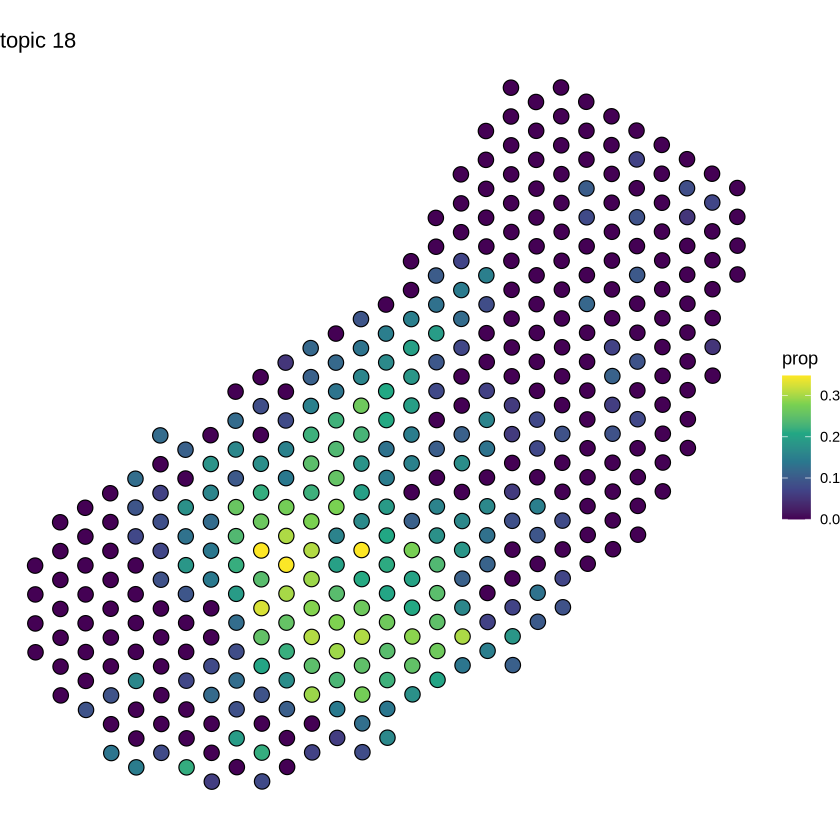

In [44]:
run_me_results(opt=18,dir = "output_18/",ldas=ldas)